# Cross-validation (CV, 交叉驗證)

<font size = 5>目的 : 防止模型過於複雜而引起過度擬合 (overfitting)</font>

交叉驗證主要分為以下幾類
1.  K-folder CV:

    將訓練集分成 k 個子集，每個子集都做一次測試集，其他子集做訓練集。最後將 k 次的結果(AUC或Acc)平均，則得到 CV score，以此當作結果。
    
2.  KK-folder CV

    和 K-folder CV 相似，但是此把 k 個子集平均分成 2 個子集(s0,s1)。用 s0 當訓練 s1 當測試; s1 當訓練 s0 當測試。可以想像成把資料分成 k 份後再做一次 k-folder CV。
    
3.  least-one-out CV (LOOCV)

    依照要本數去決定 k-folder 的 k 值。例如假設有 n 個樣本，則使用 k-folder CV，這裡 k = n 。

    優點 :
    1.  每一次 fit model 時，每個樣本幾乎都被使用到，所以 model 會最接近母體樣本的分佈。
    2.  實驗中沒有隨機因素會影響結果

    缺點 :
    1.  相較前兩者，計算成本較高。
    

10 fold 圖例:

<img src="https://i.imgur.com/tLWEE80.png" width="50%" height="50%">

CV 除了預防 overfitting ，也有其他用途。例如：
*   在 Logistic ridge regression 要用 training set fit model 時，必須去決定 $\lambda$ (tuning parameter) ，此時可以利用 CV 的方式去尋找。(KNN 的K 也同樣)
*   完整資料 (沒有分training set, test set) 中，利用 CV 去分 training 跟 test 。
*   ...


### python
*   kfold = [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)(n_splits = k, shuffle = True/False , random_state = int )
    *   n_splits : 幾次cv, default=5
    *   shuffle : 是否重新洗牌 (index改變) ? 若為 false , 則不用放 random_state , 因為 index 不會改變, default=False
    *   random_state : 種子碼，若 shuffle = True , 則要填寫。 default=None
*   scores = [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)(estimator, X, y=None, * , groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    *   estimator : model
    *   cv : cv值，可以放入 kfold(n_splits = k, shuffle = True/False , random_state = int )
    *   scoring : 評分標準(例如: 'accuracy' 或 'roc_auc')，參考下圖。


[圖片來源 : Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

<img src="https://img-blog.csdn.net/20180924201007560?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzMyNTkwNjMx/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70" width="50%" height="50%">

#### e.g. 1
固定 k 值。

In [136]:
from sklearn.model_selection import KFold,cross_val_score  
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import random

In [137]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [151]:

knn = KNeighborsClassifier(n_neighbors=9) #KNN 找9個鄰近值
kfold = KFold(n_splits=10, shuffle=True, random_state=45)
scores = cross_val_score(knn,X,y,cv=kfold,scoring='accuracy')  #5 fold, cv score 用 acc 去計算
print(scores)
print(scores.mean())

[1.         1.         1.         1.         0.86666667 0.93333333
 1.         0.93333333 0.93333333 1.        ]
0.9666666666666666


#### e.g. 2


In [129]:
from sklearn.model_selection import KFold,cross_val_score  
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [134]:
k_range = [3+2*i for i in range(15)]
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    kfold = KFold(n_splits=10, shuffle=True, random_state=44)
    scores = cross_val_score(knn,X,y,cv=kfold,scoring='accuracy')
    k_scores.append(scores.mean())

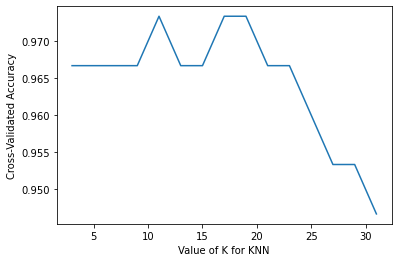

In [135]:
plt.plot(k_range,k_scores) # 畫不同 k 值，cv score 的大小
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

參考資料
1.  [[Day29]機器學習：交叉驗證！](https://ithelp.ithome.com.tw/articles/10197461)
2.  [机器学习中的交叉验证（cross-validation）](https://blog.csdn.net/lhx878619717/article/details/49079785)
3.  [sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
4.  [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

knn = KNeighborsClassifier(metric = mydist)

kfold = RepeatedStratifiedKFold(n_splits = 5, random_state = 0, n_repeats = 10)

param_grid = [{'n_neighbors': param_k}]

gs = GridSearchCV(estimator = knn, 
                    param_grid = param_grid, 
                    scoring = 'roc_auc', 
                    cv = kfold, 
                    n_jobs = -1)